<a href="https://colab.research.google.com/github/bhuvaneswarilakshmipathy/ML_programs_/blob/main/2)_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Creating a DataFrame from the data
data = {
    'Hours_Studied': [10, 8, ..., 12],
    'Previous_Test_Scores': [85, 75, ..., 95],
    'Attendance': [90, 80, ..., 95],
    'Final_Exam_Score': [90, 85, ..., 95]
}
df = pd.DataFrame(data)

# Convert the DataFrame to numeric type
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Independent variables
X = df[['Hours_Studied', 'Previous_Test_Scores', 'Attendance']]

# Dependent variable
Y = df['Final_Exam_Score']

# Adding a constant term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                nan
Time:                        05:57:34   Log-Likelihood:                 81.058
No. Observations:                   3   AIC:                            -156.1
Df Residuals:                       0   BIC:                            -158.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0012 

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


# **UPDATIONS:**
**1)** HANDLE MISSING DATA

**2)** USE A TEST-TRAIN SPLIT

**3)** ADD COMMENTS AND DOCUMENTATION

**4)** INCLUDE MODEL DIAGNOSTICS

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     74.84
Date:                Tue, 27 Aug 2024   Prob (F-statistic):             0.0815
Time:                        06:15:03   Log-Likelihood:                0.55400
No. Observations:                   4   AIC:                             4.892
Df Residuals:                       1   BIC:                             3.051
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9921 

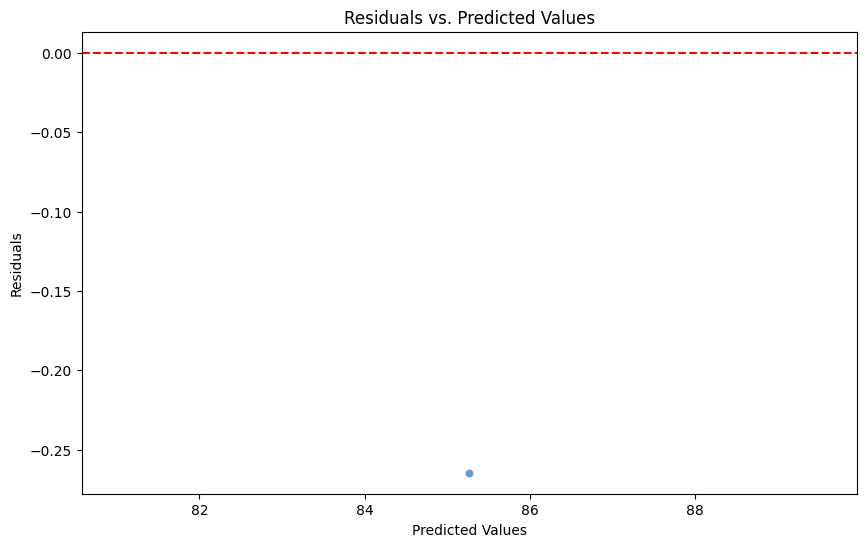

In [ ]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame from the data
data = {
    'Hours_Studied': [10, 8, 9, 11, 12],  # Example data
    'Previous_Test_Scores': [85, 75, 80, 90, 95],  # Example data
    'Attendance': [90, 80, 85, 88, 95],  # Example data
    'Final_Exam_Score': [90, 85, 88, 92, 95]  # Example data
}
df = pd.DataFrame(data)

# Convert the DataFrame to numeric type
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Independent variables
X = df[['Hours_Studied', 'Previous_Test_Scores', 'Attendance']]

# Dependent variable
Y = df['Final_Exam_Score']

# Adding a constant term
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the regression model
model = sm.OLS(Y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Predict on the test set
Y_pred = model.predict(X_test)

# Plotting residuals
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()
